# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : Rotation 45 degré 

In [91]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import copy

mp.quiet(False)

In [2]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.02     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity (used resin)
resolution = 200
len_scale = 25

sxy = b*np.sqrt(2) + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions (using perfect matched layer)
boudary_layer = mp.PML(pml)

# Geometry of the cavity (rotated 45 degree)
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     mp.Vector3(1,1,0), 
                     mp.Vector3(1,-1,0),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 2                       # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 24                      # pulse frequency width

pos_x = 0.25
pos_y = 0.41
src_centers = [mp.Vector3(-pos_x,pos_y), mp.Vector3(pos_x,pos_y), 
                   mp.Vector3(pos_x,-pos_y), mp.Vector3(-pos_x,-pos_y)]
src_size = mp.Vector3(0)
src_amps = [1,-1,1,-1]
src_compt = mp.Ez

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]
#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=src,
                    symmetries=[mp.Mirror(mp.X, phase = -1), mp.Mirror(mp.Y, phase = -1)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.001513 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.070513 s
-----------


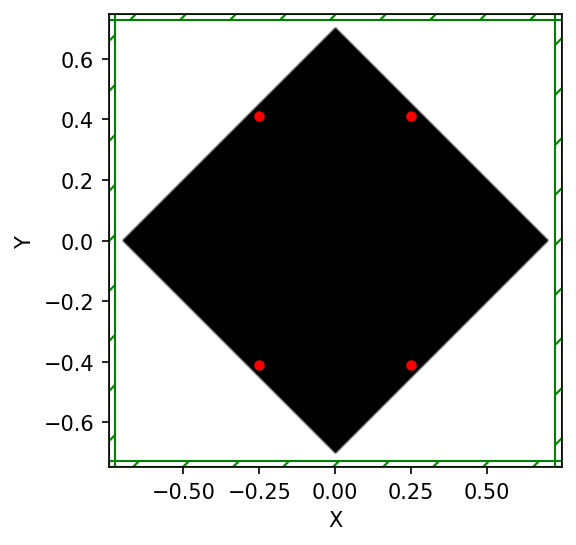

In [3]:
# visualize the cavity
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [61]:
# define step function to collect field Ez
def append_fields(sim):
    box = mp.Volume(center=pt_center, size=mp.Vector3(0,0))
    ez_fields.append(sim.get_array(vol=box, component=mp.Ez))
    hx_fields.append(sim.get_array(vol=box, component=mp.Hx))
    

In [43]:
ez_fields = []
hx_fields = []
pt_harminv = mp.Vector3(-0.37,0.12)
pt_center = copy.copy(pt_harminv)

# Chercher les fréquences de résonnance autour de fcen avec la composante Hx, source Ez
h_ez = mp.Harminv(mp.Ez, pt_harminv, fcen, df,2000) 
h_hx = mp.Harminv(mp.Hx, pt_harminv, fcen, df,2000) 

sim.fields = None
sim.reset_meep()

sim.run(mp.after_sources(h_ez),
        mp.after_sources(h_hx),
        mp.after_sources(append_fields),
        until_after_sources=700)

FloatProgress(value=0.0, description='0% done ', max=800.0)

harminv6:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv6:, 6.677247021283925, -0.012406804632770817, 269.0961621031302, 0.44133958961699393, -0.3887751187977012-0.2088888229827769i, 6.741222837542016e-11+0.0i
harminv6:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv6:, 6.677247094706422, -0.012406867483724932, 269.0948018694281, 0.15813834060915802, -0.09566054086811658+0.12592376936638086i, 3.3168295396286634e-10+0.0i


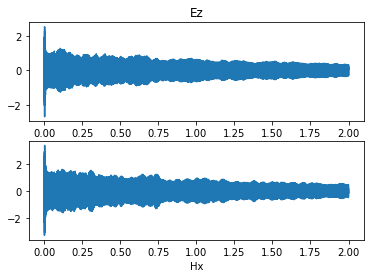

In [10]:
ez1 = ez_fields.copy()
hx1 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez1))
t2 = np.arange(0.0, 2.0, 2/len(hx1))

plt.subplot(2, 1, 1)
plt.plot(t1, ez1)
plt.title('Ez')

plt.subplot(2, 1, 2)
plt.plot(t2, hx1)
plt.xlabel('Hx')

plt.show()

In [26]:
#np.savez('Ez_odd_t700', np.array(ez_fields))
#np.savez('Hx_odd_t700', np.array(hx_fields))

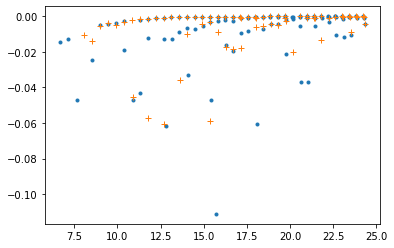

In [8]:
modes_Ez = np.array(h_ez.modes)
modes_Hx = np.array(h_hx.modes)

plt.plot(np.abs(modes_Ez[:,0]), -np.abs(modes_Ez[:,1]), '.')
plt.plot(np.abs(modes_Hx[:,0]), -np.abs(modes_Hx[:,1]), '+')

In [9]:
print(modes_Ez)

[[ 6.67990010e+00+0.00000000e+00j -1.46094454e-02+0.00000000e+00j
   2.28615800e+02+0.00000000e+00j  1.02218273e-02+1.15324268e-02j
   3.28666843e-06+0.00000000e+00j]
 [ 7.14154645e+00+0.00000000e+00j -1.28397368e-02+0.00000000e+00j
   2.78103304e+02+0.00000000e+00j -9.90738218e-03+2.99955327e-03j
   1.02298706e-05+0.00000000e+00j]
 [ 7.65343473e+00+0.00000000e+00j -4.71348662e-02+0.00000000e+00j
   8.11865541e+01+0.00000000e+00j -2.08707115e-02-7.71718194e-03j
   5.60044255e-05+0.00000000e+00j]
 [ 8.52933912e+00+0.00000000e+00j -2.46027765e-02+0.00000000e+00j
   1.73340987e+02+0.00000000e+00j  1.03347487e-02-3.18694235e-03j
   1.28429850e-05+0.00000000e+00j]
 [ 8.99958007e+00+0.00000000e+00j -4.65917062e-03+0.00000000e+00j
   9.65792069e+02+0.00000000e+00j  4.64826493e-03+3.95691044e-03j
   6.20449069e-07+0.00000000e+00j]
 [ 9.46358024e+00+0.00000000e+00j -4.62338430e-03+0.00000000e+00j
   1.02344729e+03+0.00000000e+00j -1.18855071e-02-9.99309680e-03j
   5.56980196e-07+0.00000000e+00j

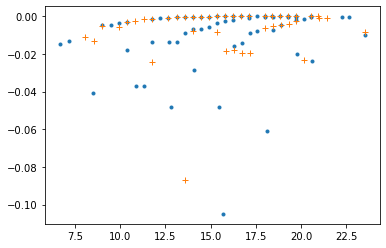

In [14]:
modes_Ez_f = modes_Ez[np.nonzero(np.abs(modes_Ez[:,3]) > 0.5e-2)]
modes_Hx_f = modes_Hx[np.nonzero(np.abs(modes_Hx[:,3]) > 0.5e-2)]

plt.plot(np.abs(modes_Ez_f[:,0]), -np.abs(modes_Ez_f[:,1]), '.')
plt.plot(np.abs(modes_Hx_f[:,0]), -np.abs(modes_Hx_f[:,1]), '+')

# Profil des modes

In [80]:
def run_mode(fcen, df, pt_center, until) :
    # overwrite parameters of append_fields
    pt_center = pt_center

    # overwrite parameter of simulation
    fcen = fcen
    df = df
    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
           mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[1]),
           mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[2], src_size, src_amps[2]),
           mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[3], src_size, src_amps[3])]

    sim.reset_meep()       # reset everything
    sim.sources = src

    sim.run(mp.after_time(0, append_fields),
            until = until)  # run until steady state

    

## 1

In [81]:
# reset 
ez_fields = []
hx_fields = []
run_mode(fcen = 6.67990010, df = 0.1, pt_center = mp.Vector3(-0.28,0.32) , until = 200)

FloatProgress(value=0.0, description='0% done ', max=200.0)

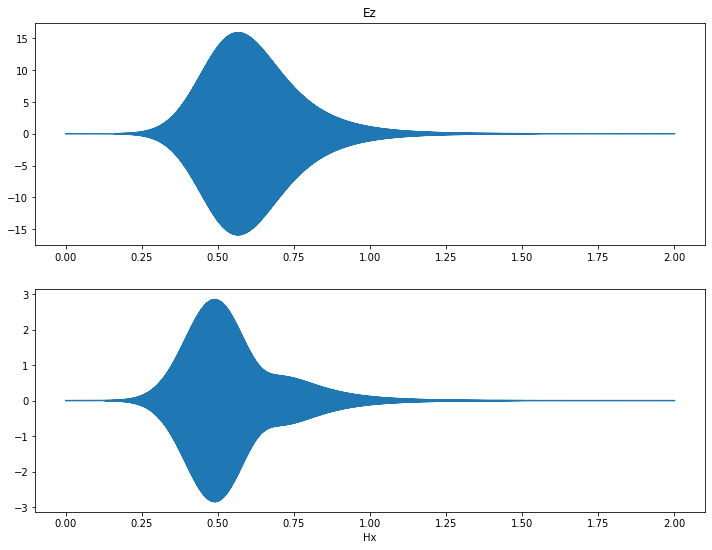

In [82]:
ez2 = ez_fields.copy()
hx2 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez2))
t2 = np.arange(0.0, 2.0, 2/len(hx2))

plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
#plt.axis([0.5,0.6,-17,17])
plt.plot(t1, ez2)
plt.title('Ez')

plt.subplot(2, 1, 2)
#plt.axis([0.5,0.6,-4,4])
plt.plot(t2, hx2)
plt.xlabel('Hx')

plt.show()

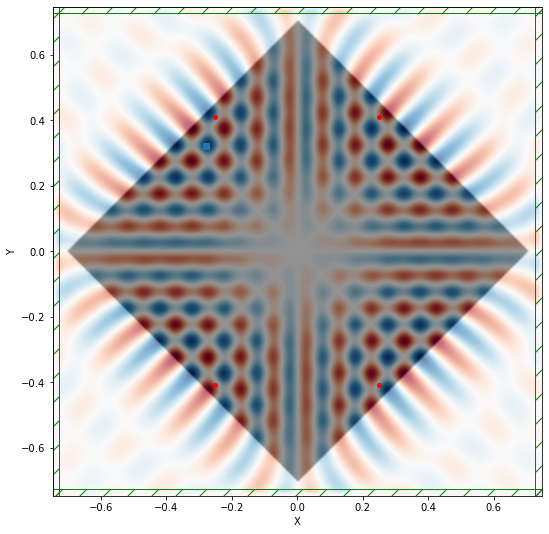

In [83]:
plt.figure(figsize=(12, 9))
x0 = [-0.28]
y0 = [0.32]
plt.plot(x0, y0, "s")
sim.plot2D(fields = mp.Ez)

# 2

In [84]:
# reset 
ez_fields = []
hx_fields = []

run_mode(fcen = 9.46358024, df = 0.1, pt_center = mp.Vector3(-0.28,0.32) , until = 200)

FloatProgress(value=0.0, description='0% done ', max=200.0)

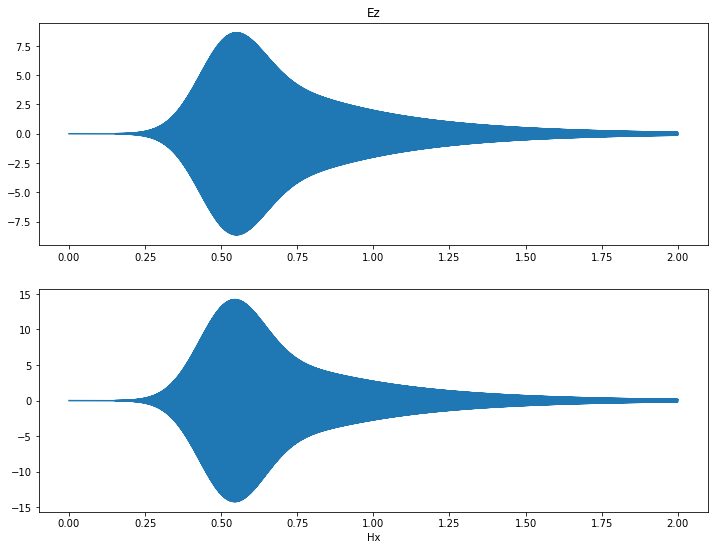

In [85]:
ez2 = ez_fields.copy()
hx2 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez2))
t2 = np.arange(0.0, 2.0, 2/len(hx2))

plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
#plt.axis([0.5,0.6,-17,17])
plt.plot(t1, ez2)
plt.title('Ez')

plt.subplot(2, 1, 2)
#plt.axis([0.5,0.6,-4,4])
plt.plot(t2, hx2)
plt.xlabel('Hx')

plt.show()

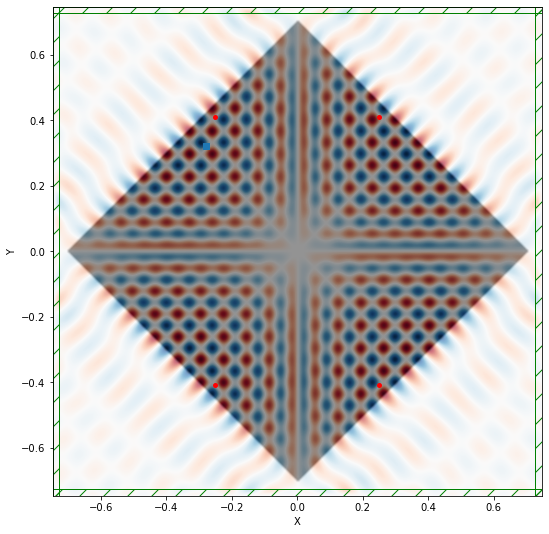

In [86]:
plt.figure(figsize=(12, 9))
x0 = [-0.28]
y0 = [0.32]
plt.plot(x0, y0, "s")
sim.plot2D(fields = mp.Ez)

# 3

In [92]:
# reset 
ez_fields = []
hx_fields = []

run_mode(fcen = 1.03831433e+01, df = 0.0005, pt_center = mp.Vector3(-0.28,0.32) , until = 4000)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00154305 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.071758 s
-----------


FloatProgress(value=0.0, description='0% done ', max=4000.0)

Meep progress: 44.54/4000.0 = 1.1% done in 4.0s, 355.2s to go
on time step 17847 (time=44.6175), 0.000224131 s/step
Meep progress: 88.63/4000.0 = 2.2% done in 8.0s, 353.1s to go
on time step 35485 (time=88.7125), 0.000226793 s/step
Meep progress: 133.425/4000.0 = 3.3% done in 12.0s, 347.8s to go
on time step 53407 (time=133.518), 0.000223196 s/step
Meep progress: 178.375/4000.0 = 4.5% done in 16.0s, 342.8s to go
on time step 71389 (time=178.472), 0.00022245 s/step
Meep progress: 223.3425/4000.0 = 5.6% done in 20.0s, 338.2s to go
on time step 89379 (time=223.447), 0.000222354 s/step
Meep progress: 268.15250000000003/4000.0 = 6.7% done in 24.0s, 334.0s to go
on time step 107304 (time=268.26), 0.000223158 s/step
Meep progress: 312.9975/4000.0 = 7.8% done in 28.0s, 329.8s to go
on time step 125246 (time=313.115), 0.000222953 s/step
Meep progress: 357.79/4000.0 = 8.9% done in 32.0s, 325.8s to go
on time step 143164 (time=357.91), 0.000223246 s/step
Meep progress: 402.33500000000004/4000.0 =

Meep progress: 2991.525/4000.0 = 74.8% done in 268.1s, 90.4s to go
on time step 1196694 (time=2991.74), 0.000226214 s/step
Meep progress: 3035.6225/4000.0 = 75.9% done in 272.1s, 86.4s to go
on time step 1214336 (time=3035.84), 0.000226732 s/step
Meep progress: 3079.85/4000.0 = 77.0% done in 276.1s, 82.5s to go
on time step 1232032 (time=3080.08), 0.000226043 s/step
Meep progress: 3124.295/4000.0 = 78.1% done in 280.1s, 78.5s to go
on time step 1249792 (time=3124.48), 0.000225229 s/step
Meep progress: 3168.6800000000003/4000.0 = 79.2% done in 284.1s, 74.5s to go
on time step 1267566 (time=3168.91), 0.000225057 s/step
Meep progress: 3213.09/4000.0 = 80.3% done in 288.1s, 70.5s to go
on time step 1285333 (time=3213.33), 0.000225141 s/step
Meep progress: 3257.415/4000.0 = 81.4% done in 292.1s, 66.6s to go
on time step 1303065 (time=3257.66), 0.000225586 s/step
Meep progress: 3302.465/4000.0 = 82.6% done in 296.1s, 62.5s to go
on time step 1321089 (time=3302.72), 0.000221941 s/step
Meep pr

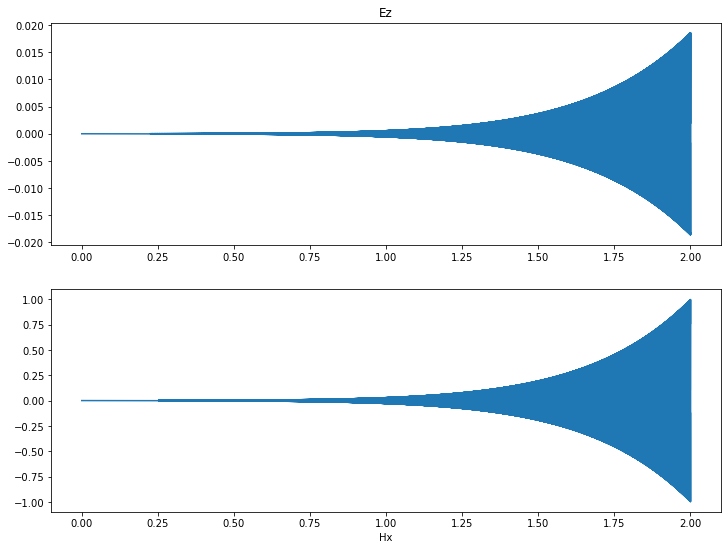

In [93]:
ez2 = ez_fields.copy()
hx2 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez2))
t2 = np.arange(0.0, 2.0, 2/len(hx2))

plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
#plt.axis([0.5,0.6,-17,17])
plt.plot(t1, ez2)
plt.title('Ez')

plt.subplot(2, 1, 2)
#plt.axis([0.5,0.6,-4,4])
plt.plot(t2, hx2)
plt.xlabel('Hx')

plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
x0 = [-0.28]
y0 = [0.32]
plt.plot(x0, y0, "s")
sim.plot2D(fields = mp.Ez)

# 4

In [97]:
# reset 
ez_fields = []
hx_fields = []

run_mode(fcen = 1.08696795e+01, df = 0.05, pt_center = mp.Vector3(-0.28,0.32) , until = 600)


-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00211096 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.069078 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.0)

Meep progress: 44.1375/600.0 = 7.4% done in 4.0s, 50.4s to go
on time step 17685 (time=44.2125), 0.000226183 s/step
Meep progress: 88.845/600.0 = 14.8% done in 8.0s, 46.0s to go
on time step 35575 (time=88.9375), 0.000223591 s/step
Meep progress: 133.0075/600.0 = 22.2% done in 12.0s, 42.1s to go
on time step 53237 (time=133.093), 0.000226482 s/step
Meep progress: 177.36/600.0 = 29.6% done in 16.0s, 38.1s to go
on time step 70987 (time=177.468), 0.000225357 s/step
Meep progress: 221.7825/600.0 = 37.0% done in 20.0s, 34.1s to go
on time step 88746 (time=221.865), 0.000225252 s/step
Meep progress: 265.6/600.0 = 44.3% done in 24.0s, 30.2s to go
on time step 106289 (time=265.723), 0.000228025 s/step
Meep progress: 310.09250000000003/600.0 = 51.7% done in 28.0s, 26.2s to go
on time step 124088 (time=310.22), 0.00022474 s/step
Meep progress: 354.6975/600.0 = 59.1% done in 32.0s, 22.1s to go
on time step 141932 (time=354.83), 0.000224177 s/step
Meep progress: 399.27750000000003/600.0 = 66.5% d

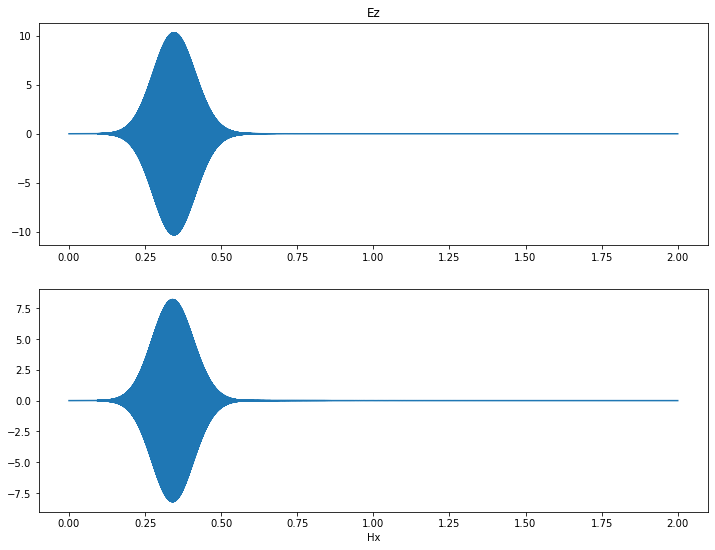

In [98]:
ez2 = ez_fields.copy()
hx2 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez2))
t2 = np.arange(0.0, 2.0, 2/len(hx2))

plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
#plt.axis([0.5,0.6,-17,17])
plt.plot(t1, ez2)
plt.title('Ez')

plt.subplot(2, 1, 2)
#plt.axis([0.5,0.6,-4,4])
plt.plot(t2, hx2)
plt.xlabel('Hx')

plt.show()

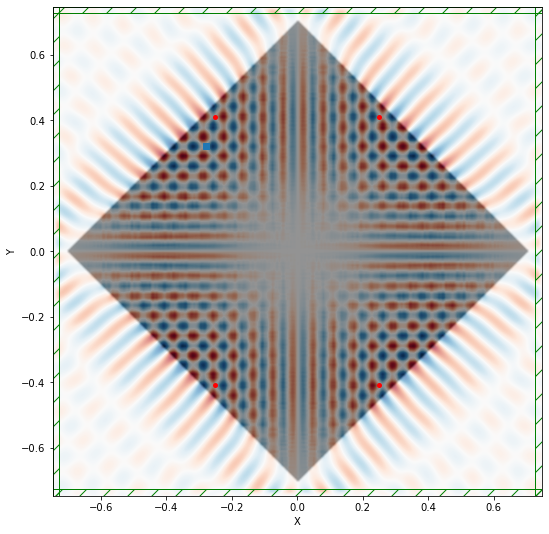

In [99]:
plt.figure(figsize=(12, 9))
x0 = [-0.28]
y0 = [0.32]
plt.plot(x0, y0, "s")
sim.plot2D(fields = mp.Ez)

# 5

In [100]:
# reset 
ez_fields = []
hx_fields = []

run_mode(fcen = 1.12997663e+01, df = 0.05, pt_center = mp.Vector3(-0.28,0.32) , until = 600)


-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00268698 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.0648201 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.0)

Meep progress: 38.24/600.0 = 6.4% done in 4.0s, 58.8s to go
on time step 15332 (time=38.33), 0.000260902 s/step
Meep progress: 75.8625/600.0 = 12.6% done in 8.0s, 55.3s to go
on time step 30382 (time=75.955), 0.000265796 s/step
Meep progress: 113.73/600.0 = 19.0% done in 12.0s, 51.3s to go
on time step 45527 (time=113.817), 0.000264114 s/step
Meep progress: 155.3475/600.0 = 25.9% done in 16.0s, 45.8s to go
on time step 62176 (time=155.44), 0.000240269 s/step
Meep progress: 193.665/600.0 = 32.3% done in 20.0s, 42.0s to go
on time step 77504 (time=193.76), 0.000260965 s/step
Meep progress: 232.5675/600.0 = 38.8% done in 24.0s, 37.9s to go
on time step 93067 (time=232.668), 0.000257041 s/step
Meep progress: 274.305/600.0 = 45.7% done in 28.0s, 33.2s to go
on time step 109758 (time=274.395), 0.000239687 s/step
Meep progress: 314.995/600.0 = 52.5% done in 32.0s, 29.0s to go
on time step 126062 (time=315.155), 0.000245341 s/step
Meep progress: 356.91/600.0 = 59.5% done in 36.0s, 24.5s to go


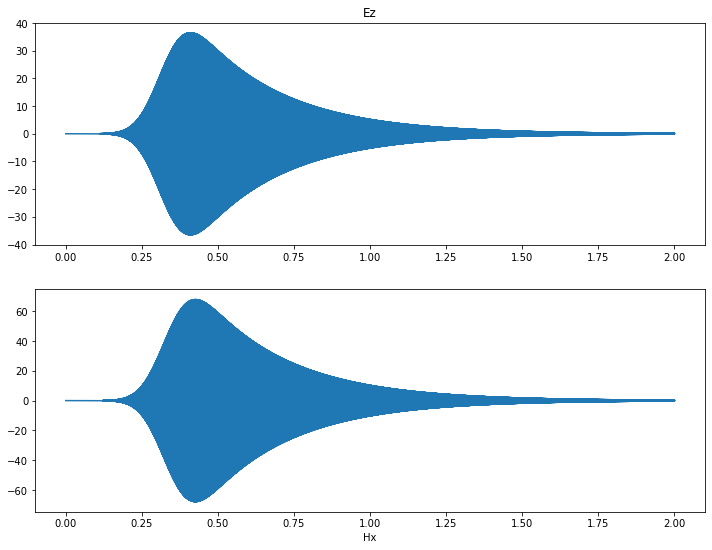

In [101]:
ez2 = ez_fields.copy()
hx2 = hx_fields.copy()

t1 = np.arange(0.0, 2.0, 2/len(ez2))
t2 = np.arange(0.0, 2.0, 2/len(hx2))

plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
#plt.axis([0.5,0.6,-17,17])
plt.plot(t1, ez2)
plt.title('Ez')

plt.subplot(2, 1, 2)
#plt.axis([0.5,0.6,-4,4])
plt.plot(t2, hx2)
plt.xlabel('Hx')

plt.show()

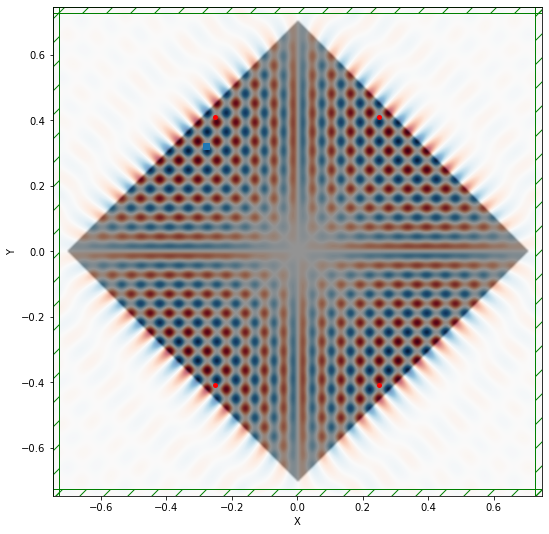

In [102]:
plt.figure(figsize=(12, 9))
x0 = [-0.28]
y0 = [0.32]
plt.plot(x0, y0, "s")
sim.plot2D(fields = mp.Ez)